In [ ]:
#!/usr/bin/env python
# coding: utf-8

# ### Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset and viewing the first 5 rows
df = pd.read_excel("/content/drive/MyDrive/COVID19.xlsx")
df.head()

,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,...,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,PENDING
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MALE,1988.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,1978.0,NO,NO,NO,YES,NO,YES,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE


In [ ]:
# ### Exploratory Data Analysis
# To view the shape of the dataset
df.shape

(109927, 47)

In [ ]:
# In[58]:


# To view info about the dataset
df.info()

# Checking for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Sex                                        107228 non-null  object 
 1   Birth Year                                 94963 non-null   float64
 2   Chest pain                                 42120 non-null   object 
 3   Chills or sweats                           24857 non-null   object 
 4   Confused or disoriented                    23127 non-null   object 
 5   Cough                                      42218 non-null   object 
 6   Diarrhea                                   42092 non-null   object 
 7   Difficulty breathing or Dyspnea            24940 non-null   object 
 8   Digested blood or coffee grounds in vomit  1397 non-null    object 
 9   Pain behind eyes or Sensitivity to light   1405 non-null    object 
 10  Bleeding

np.int64(104360)

In [ ]:



# In[60]:


# Viewing duplicated rows
df[df.duplicated(keep=False)]


# We will ignore duplicates as many people can can have same birth year and gender

# In[61]:

,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,...,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,PENDING
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MALE,1991.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
11,MALE,1969.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109920,FEMALE,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PENDING
109921,FEMALE,1983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PENDING
109922,MALE,NaN,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
109923,MALE,1996.0,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE


In [ ]:



# To view the missing values of each column as percentages
((df.isnull().sum() / len(df)) * 100).round(0)


,0
Sex,2.0
Birth Year,14.0
Chest pain,62.0
Chills or sweats,77.0
Confused or disoriented,79.0
Cough,62.0
Diarrhea,62.0
Difficulty breathing or Dyspnea,77.0
Digested blood or coffee grounds in vomit,99.0
Pain behind eyes or Sensitivity to light,99.0


In [ ]:


# ### Data Preprocessing

# In[62]:


# using the Cramers V Cramér's V to assess whether a statistically significant relationship exists between each
# categorical predictor and the target variable "Result."

import scipy.stats as ss  # Import scipy.stats and alias it as ss

def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for the association between two categorical variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Correction for bias:
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:


# Identify categorical columns (dtype 'object' or 'category')
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or str(df[col].dtype) == 'category']

# Iterate over categorical columns with more than 80% missing values
for col in cat_cols:
    missing_pct = df[col].isnull().mean() * 100
    if missing_pct > 80:
        # Replace missing values with "UNKNOWN" before computing Cramér's V
        cv = cramers_v(df[col].fillna("UNKNOWN"), df['Result'])
        print(f"Cramer's V for {col} (missing {missing_pct:.1f}%): {cv:.3f}")



Cramer's V for Digested blood or coffee grounds in vomit (missing 98.7%): 0.100
Cramer's V for Pain behind eyes or Sensitivity to light (missing 98.7%): 0.098
Cramer's V for Bleeding from the eyes (missing 98.7%): 0.100
Cramer's V for Fluid in the lung cavity (missing 98.7%): 0.099
Cramer's V for Bleeding of the gums (missing 98.7%): 0.100
Cramer's V for Malaise (missing 97.3%): 0.147
Cramer's V for Pharyngeal exudate (missing 97.3%): 0.207
Cramer's V for Maculopapular rash (missing 80.9%): 0.269
Cramer's V for Bleeding or bruising (missing 80.9%): 0.269
Cramer's V for Conjunctivitis (missing 83.0%): 0.281
Cramer's V for Enlarged lymph nodes (missing 80.9%): 0.269
Cramer's V for Wheezing (missing 80.9%): 0.269
Cramer's V for Skin ulcers (missing 80.9%): 0.380
Cramer's V for Inability to walk (missing 80.9%): 0.269
Cramer's V for Indrawing of chest wall (missing 80.9%): 0.269
Cramer's V for Specify other complications (missing 100.0%): 0.005


In [ ]:


# The Cramér’s V values show that many of the features with a lot of missing data have only a weak to moderate relationship with the target variable "Result." However, because these features are missing most of their data, we cannot be very confident in these measurements. In other words, the little data we have might not truly reflect how important these features are for predicting "Result."

# ##### Dropping unuseful columns

# In[119]:


# Calculate missing percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [ ]:


# Identify columns with more than 80% missing values
cols_to_drop = missing_percentage[missing_percentage > 80].index.tolist()


In [ ]:

# Print which columns will be dropped
#print("Columns to be dropped (more than 80% missing):")
#print(cols_to_drop)

# Drop the identified columns from the DataFrame
df = df.drop(columns=cols_to_drop)

In [ ]:



# The above columns were dropped because they have more than 80% missing values. Such a high level of missingness means that there is insufficient data to reliably impute or extract useful information from these features. Keeping these columns may introduce noise or bias into the model, so removing them helps improve the overall quality and reliability of the predictive model.

# In[64]:


# creating 'Age' column from year
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Birth Year']


In [ ]:

# Display the first few rows to verify
print(df[['Birth Year', 'Age']].head())


# In[65]:


   Birth Year   Age
0      1967.0  58.0
1      1976.0  49.0
2      1988.0  37.0
3      1980.0  45.0
4      1978.0  47.0


In [ ]:


df.head()


,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Fatigue or general weakness,Fever,...,Vomiting,Abnormal lung X-Ray findings,Acute respiratory distress syndrome,Pneumonia (clinical or radiologic),Loss of Taste,Loss of Smell,Cough with sputum,Cough with heamoptysis,Result,Age
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,PENDING,58.0
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
2,MALE,1988.0,NO,NO,NO,NO,NO,NO,NO,YES,...,NO,NO,NO,NO,NaN,NaN,NaN,NaN,NEGATIVE,37.0
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4,FEMALE,1978.0,NO,NO,NO,YES,NO,YES,NO,NO,...,NO,NO,NO,NO,NaN,NaN,NaN,NaN,NEGATIVE,47.0


In [ ]:


# ##### Replacing missing values in Categorical columns as "Unknown" since there were not accounted for and makes up signficant part of the datatset

# In[66]:


# Identify categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or str(df[col].dtype) == 'category']

# Replace null values in the identified categorical columns with "UNKNOWN"
df[cat_cols] = df[cat_cols].fillna("UNKNOWN")

# Verify the changes
print(df[cat_cols].isnull().sum())



Sex                                     0
Chest pain                              0
Chills or sweats                        0
Confused or disoriented                 0
Cough                                   0
Diarrhea                                0
Difficulty breathing or Dyspnea         0
Fatigue or general weakness             0
Fever                                   0
Fluid in lung cavity in auscultation    0
Fluid in cavity through X-Ray           0
Headache                                0
Joint pain or arthritis                 0
Thorax (sore throat)                    0
Muscle pain                             0
Nausea                                  0
Other clinical symptoms                 0
Rapid breathing                         0
Runny nose                              0
Sore throat or pharyngitis              0
Vomiting                                0
Abnormal lung X-Ray findings            0
Acute respiratory distress syndrome     0
Pneumonia (clinical or radiologic)

In [ ]:


# In[67]:


# To view the number of missing ages
df['Age'].isnull().sum()


# In[68]:


np.int64(14964)

In [ ]:


# To view rows with missing age
df[df['Age'].isnull()]


# ##### Plotting the age distribution with a fitted normal curve to visually assess how closely the data follows a normal distribution

# In[70]:


,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Fatigue or general weakness,Fever,...,Vomiting,Abnormal lung X-Ray findings,Acute respiratory distress syndrome,Pneumonia (clinical or radiologic),Loss of Taste,Loss of Smell,Cough with sputum,Cough with heamoptysis,Result,Age
81,MALE,NaN,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NEGATIVE,NaN
87,MALE,NaN,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NEGATIVE,NaN
104,MALE,NaN,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NEGATIVE,NaN
105,MALE,NaN,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NEGATIVE,NaN
111,MALE,NaN,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NEGATIVE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109908,MALE,NaN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,NO,NO,...,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,NEGATIVE,NaN
109914,FEMALE,NaN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,NO,NO,...,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,NEGATIVE,NaN
109916,MALE,NaN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,NO,NO,...,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,NEGATIVE,NaN
109918,FEMALE,NaN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,NO,NO,...,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,NEGATIVE,NaN


<Axes: xlabel='Age', ylabel='Density'>

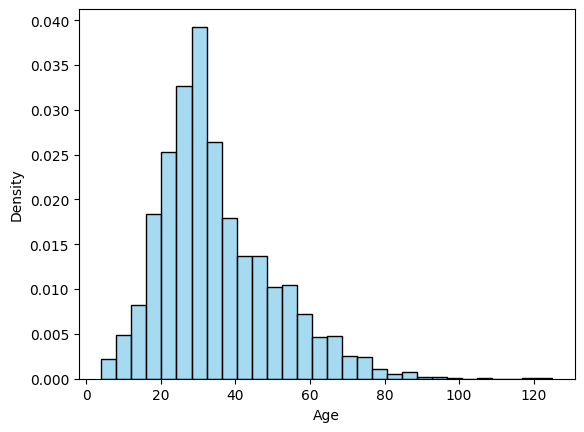

In [ ]:


# importing the normal cuve
from scipy.stats import norm

# Plot the histogram with density scaling
sns.histplot(df['Age'], bins=30, stat='density', color='skyblue', label='Age Histogram')

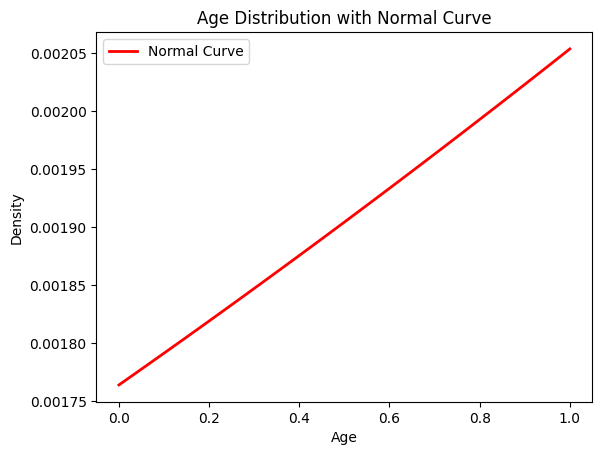

In [ ]:

# Calculate mean and standard deviation of the Age column
mu, std = df['Age'].mean(), df['Age'].std()

# Generate x values spanning the range of the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Compute the normal PDF values for these x values
p = norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r', linewidth=2, label='Normal Curve')

plt.title('Age Distribution with Normal Curve')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

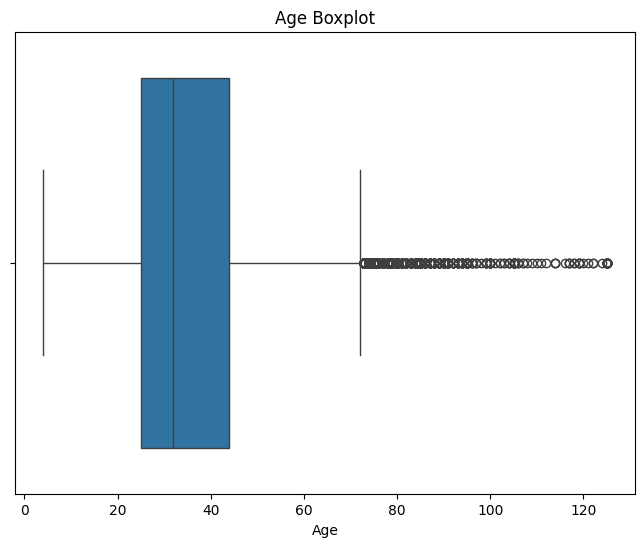

In [ ]:



# In[71]:


# A boxplot of the age distribution visualizes the spread, central tendency, and potential outliers in the data.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

In [ ]:




# In[72]:


# since the age has outliers which is expected, the best way to handle missing values is by using the median
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)


# In[73]:


In [ ]:


# Checking for missing values in age column
df['Age'].isnull().sum()

np.int64(0)

In [ ]:



# In[74]:


# Dropping the 'Birth Year' column since we have age column
df.drop(columns=['Birth Year'], inplace=True)


# In[75]:


#df.columns

In [ ]:



# In[76]:


# To view the value count of sex
df['Sex'].value_counts()


# In[77]:

,count
Sex,
MALE,73182
FEMALE,34041
UNKNOWN,2703
OTHER,1


In [ ]:



# Replacing Other with Unknown to standnardize the column
df['Sex'] = df['Sex'].replace("OTHER", "UNKNOWN")


# In[78]:

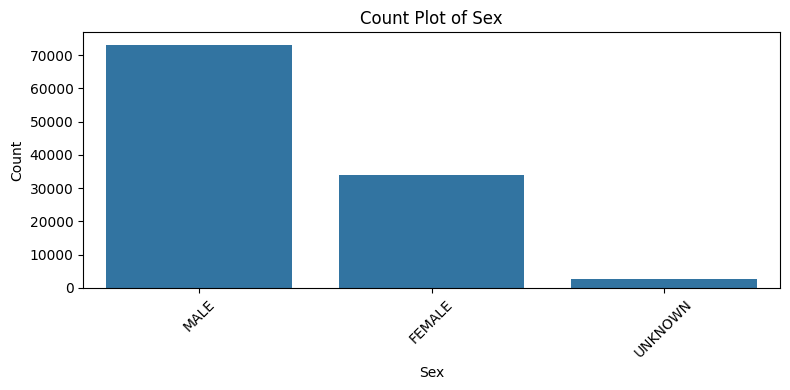

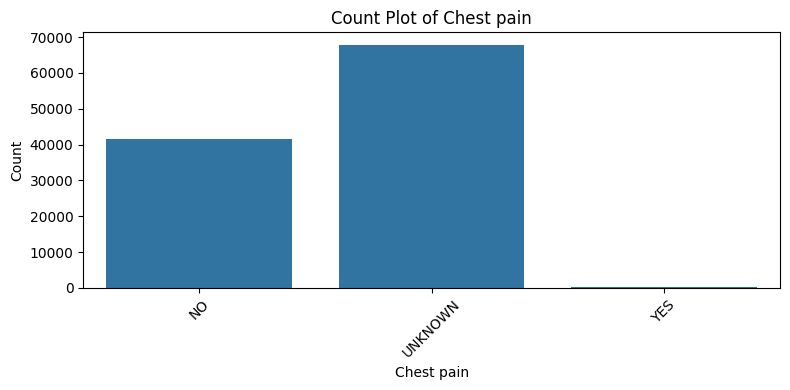

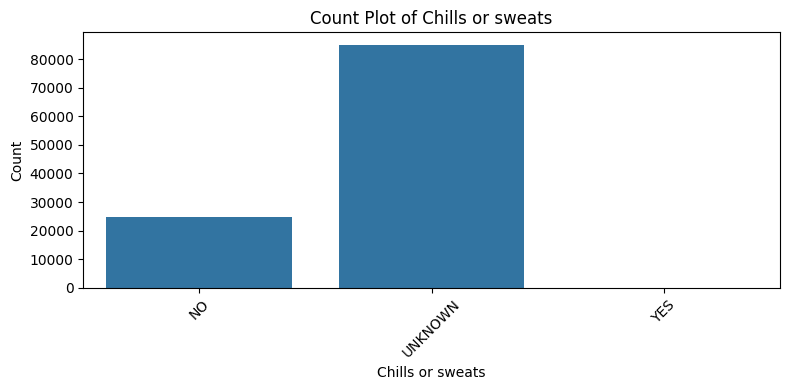

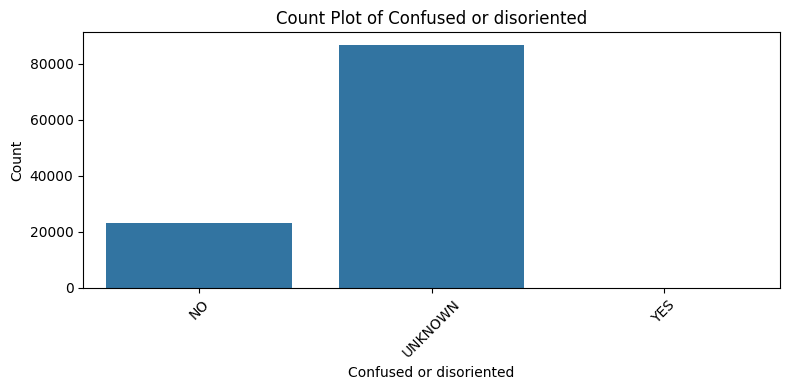

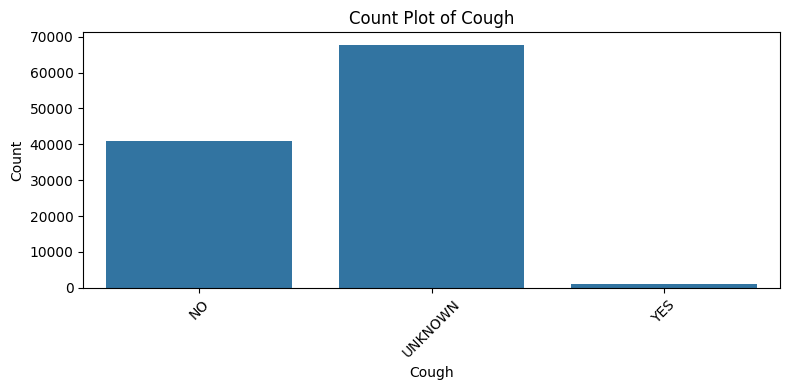

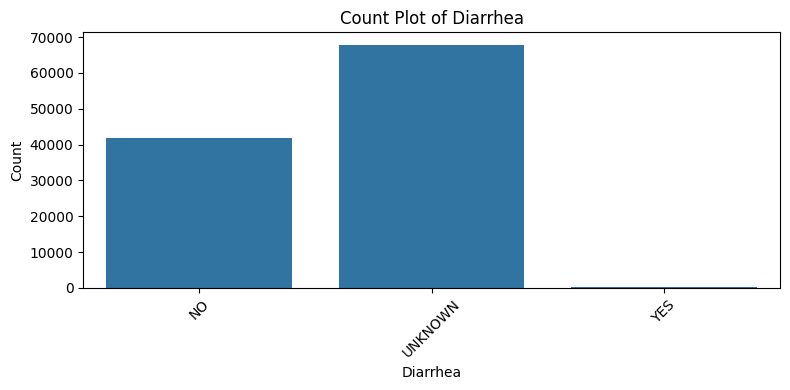

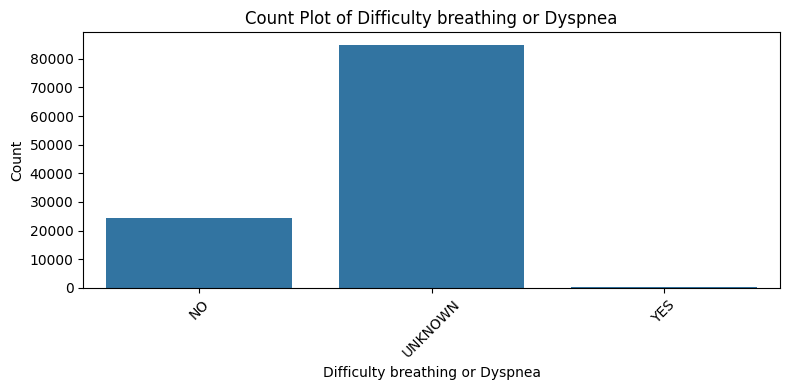

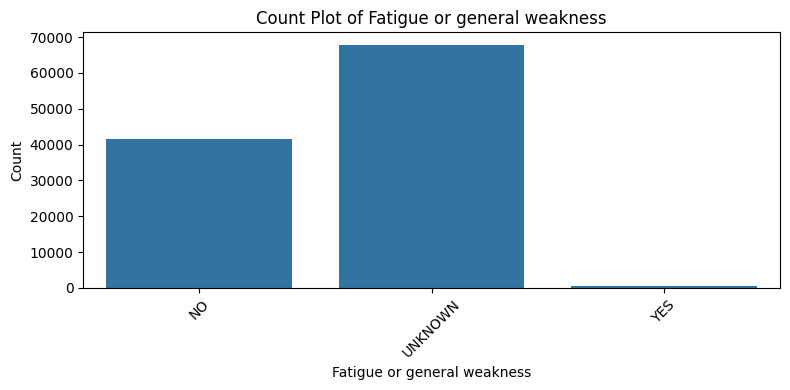

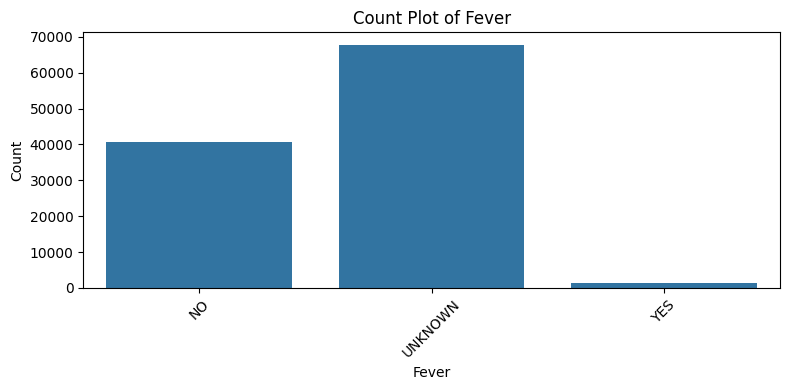

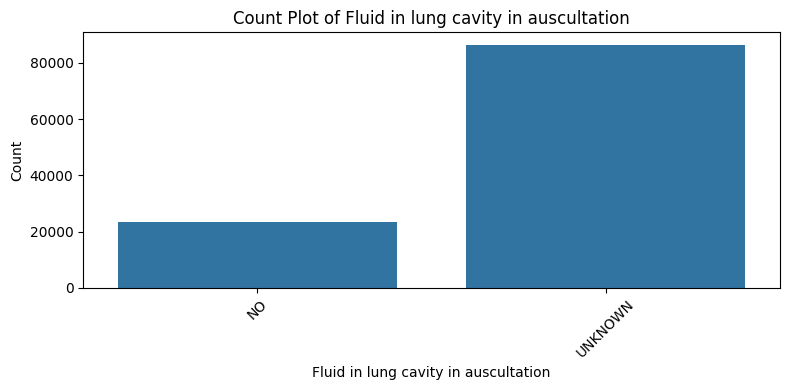

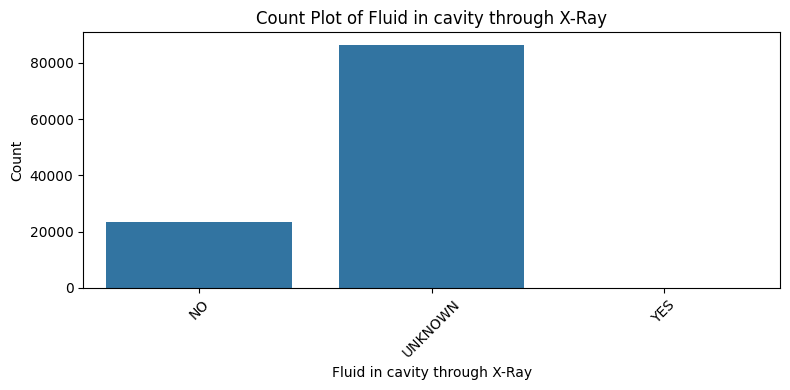

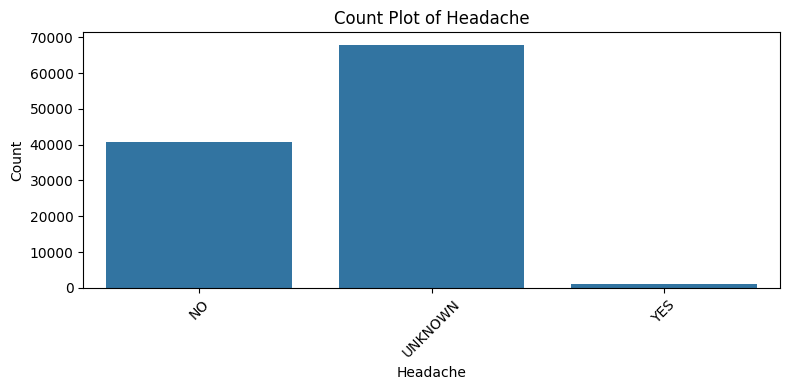

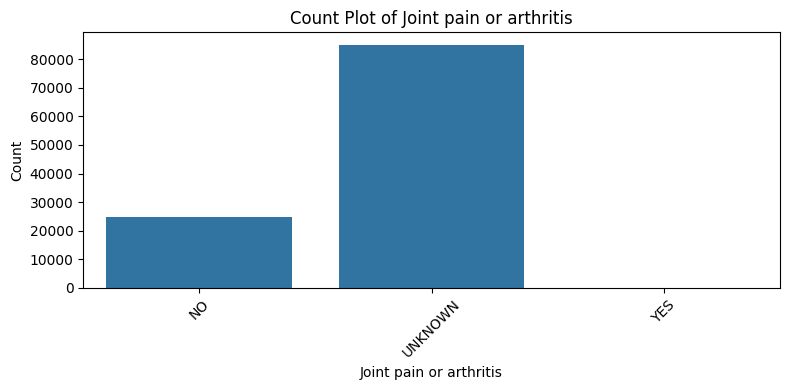

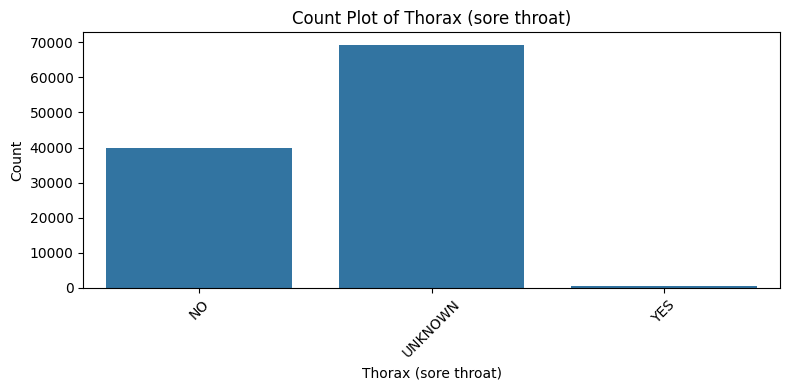

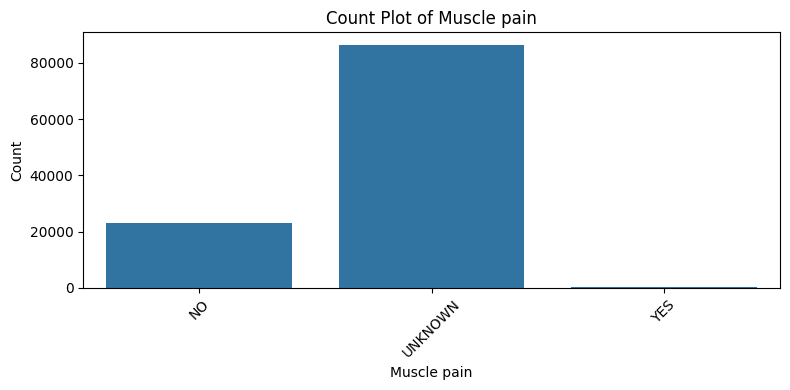

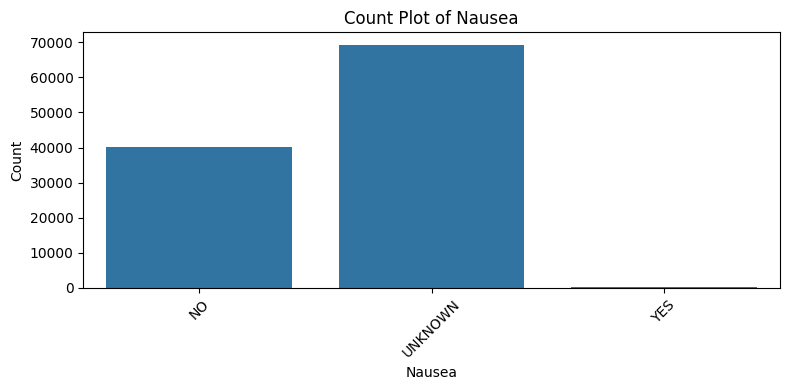

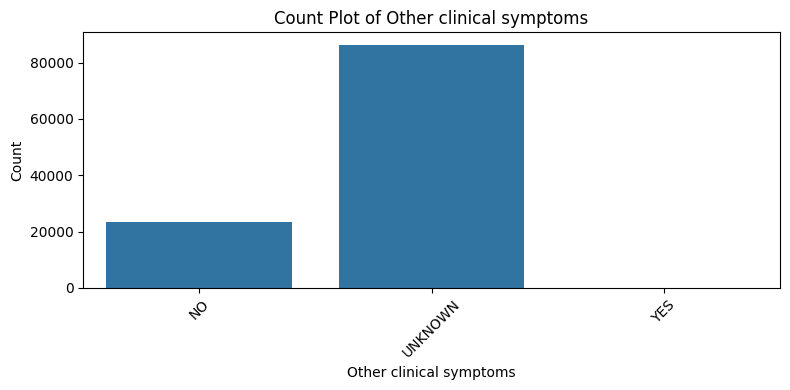

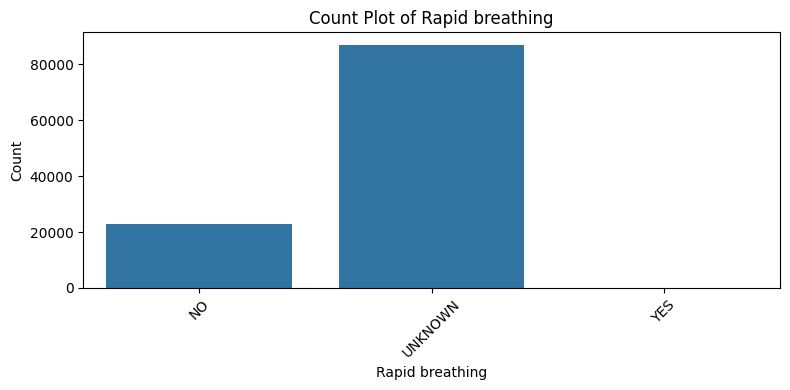

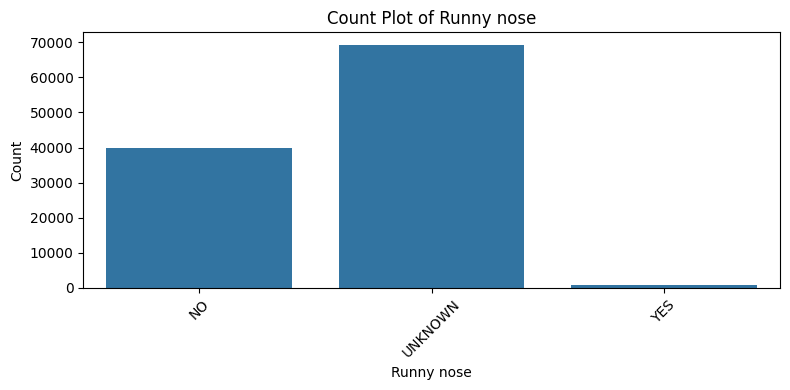

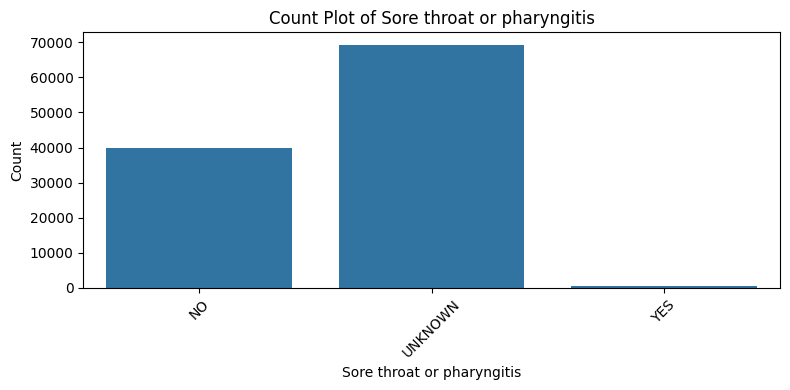

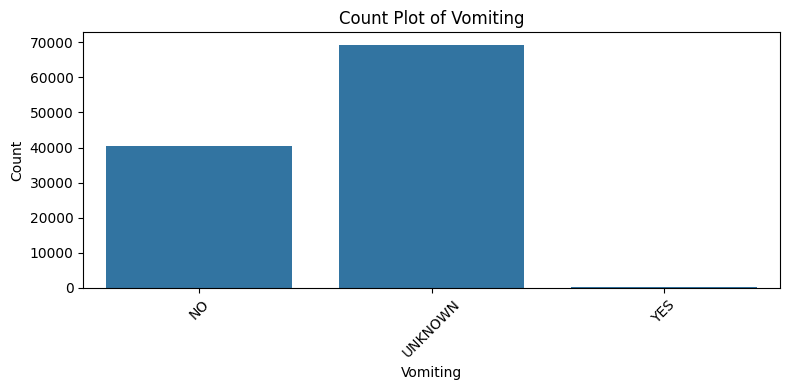

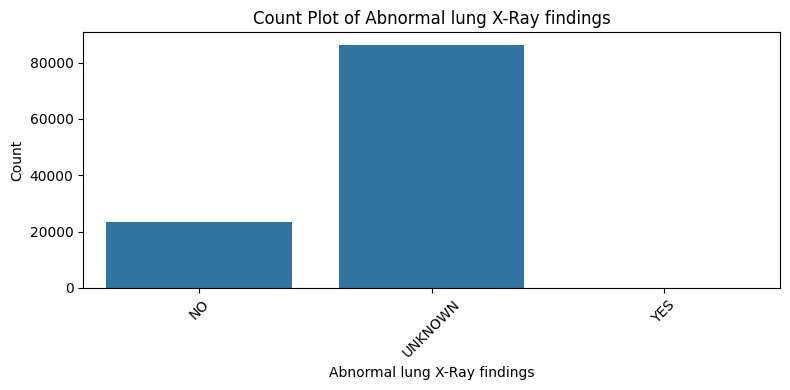

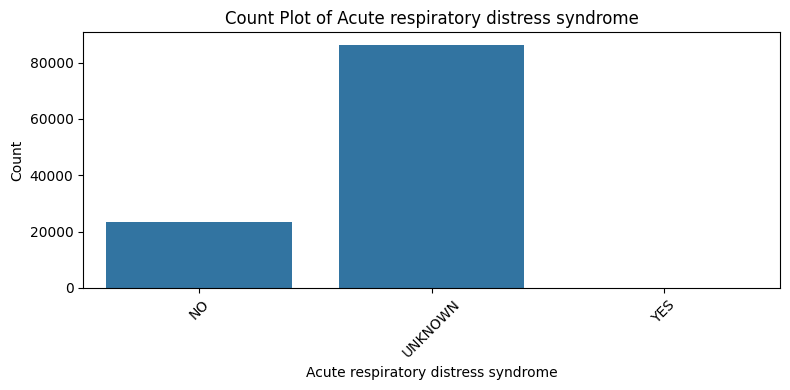

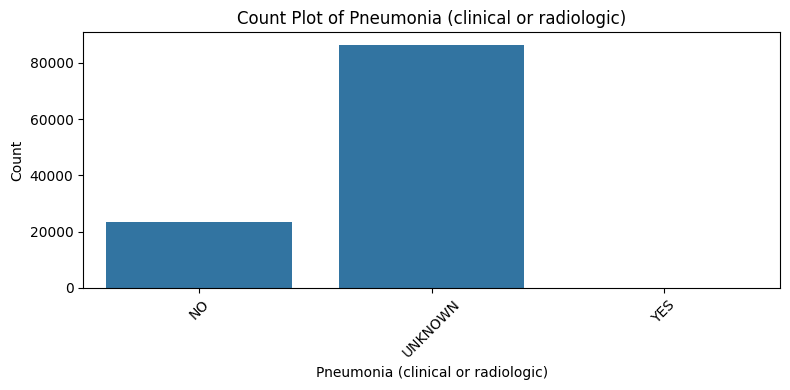

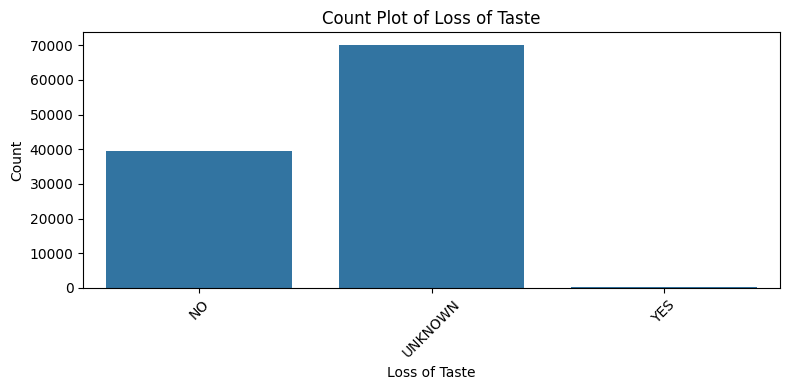

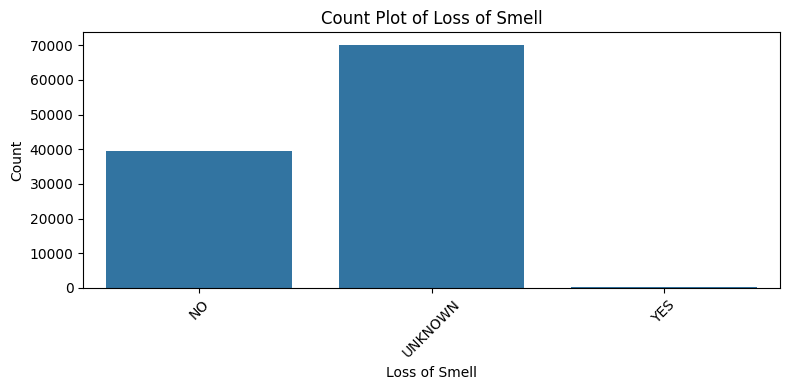

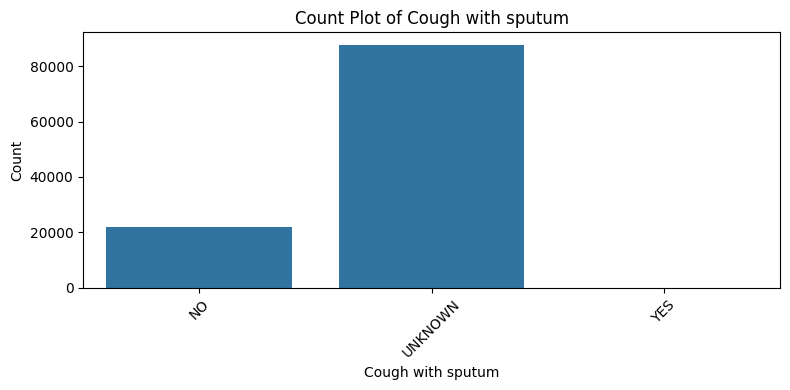

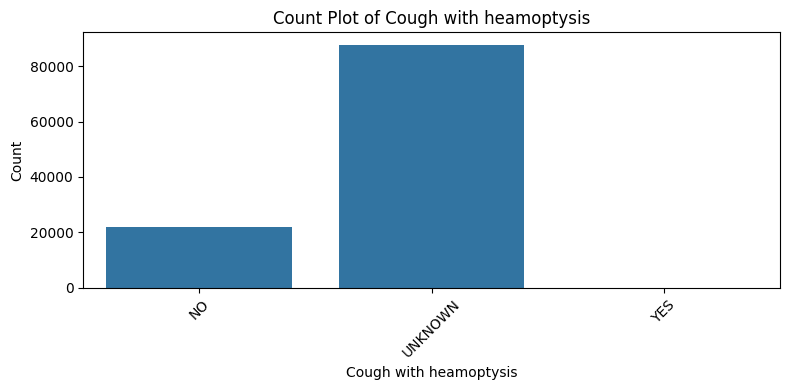

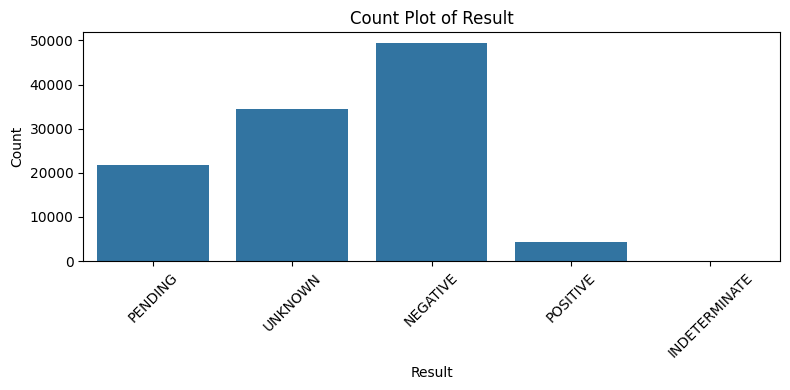

In [ ]:



# To visualize the distribution categorical columns using countplot

def visualize_categorical_columns(df):
    """
    Visualize categorical columns in the DataFrame using count plots.

    This function identifies columns that are non-numeric (of dtype 'object' or 'category')
    and displays a count plot for each one.
    """
    # Identify categorical columns: those with dtype 'object' or 'category'
    cat_cols = [col for col in df.columns
                if df[col].dtype == 'object' or str(df[col].dtype) == 'category']

    if not cat_cols:
        print("No categorical columns found.")
        return

    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:
visualize_categorical_columns(df)

In [ ]:




# In[79]:


# To viualize the classes of each categorical column

def print_categorical_value_counts(df):
    """
    Prints the value counts for each categorical column in the DataFrame.

    A categorical column is defined as one with dtype 'object' or 'category'.
    """
    # Identify categorical columns
    cat_cols = [col for col in df.columns if df[col].dtype == 'object' or str(df[col].dtype) == 'category']

    # Loop over each categorical column and print its value counts
    for col in cat_cols:
        print(f"Value counts for '{col}':")
        print(df[col].value_counts())
        print("-" * 50)  # Separator for readability


print_categorical_value_counts(df)


Value counts for 'Sex':
Sex
MALE       73182
FEMALE     34041
UNKNOWN     2704
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Chest pain':
Chest pain
UNKNOWN    67920
NO         41663
YES          344
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Chills or sweats':
Chills or sweats
UNKNOWN    85106
NO         24752
YES           69
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Confused or disoriented':
Confused or disoriented
UNKNOWN    86835
NO         23089
YES            3
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Cough':
Cough
UNKNOWN    67815
NO         40917
YES         1195
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Diarrhea':
Diarrhea
UNKNOWN    67945
NO         41748
YES          234
Name: count, dtype: int64
---------------------

In [ ]:


# ### Feature Engineering

# In[80]:


# Standardizing the target varaible to have only two classes
df['Result'] = df['Result'].apply(lambda x: 'POSITIVE' if x == 'POSITIVE' else 'NOT_POSITIVE')

# Then map to numeric labels:
df['Result'] = df['Result'].map({'NOT_POSITIVE': 0, 'POSITIVE': 1})
df['Result']


# In[83]:


# Value count of the target variable
df['Result'].value_counts()


,count
Result,
0,105597
1,4330


In [ ]:


# The target variable is highly imbalanced, with about 96% of the cases in class 0 and only around 4% in class 1.

# In[84]:


df.head()


# In[85]:


# Separating features and target.
X = df.drop(columns=['Result'])
y = df['Result']


# In[86]:


X.head()

,Sex,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Fatigue or general weakness,Fever,Fluid in lung cavity in auscultation,...,Sore throat or pharyngitis,Vomiting,Abnormal lung X-Ray findings,Acute respiratory distress syndrome,Pneumonia (clinical or radiologic),Loss of Taste,Loss of Smell,Cough with sputum,Cough with heamoptysis,Age
0,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,58.0
1,MALE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,49.0
2,MALE,NO,NO,NO,NO,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,37.0
3,MALE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,45.0
4,FEMALE,NO,NO,NO,YES,NO,YES,NO,NO,NO,...,YES,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,47.0


In [ ]:



# In[87]:


# Identifing categorical columns in the features
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or str(X[col].dtype) == 'category']

# One-hot encode the feature columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=False).astype(int)
X_encoded


# ### Model Training

# In[88]:


,Age,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Chest pain_NO,Chest pain_UNKNOWN,Chest pain_YES,Chills or sweats_NO,Chills or sweats_UNKNOWN,Chills or sweats_YES,...,Loss of Taste_YES,Loss of Smell_NO,Loss of Smell_UNKNOWN,Loss of Smell_YES,Cough with sputum_NO,Cough with sputum_UNKNOWN,Cough with sputum_YES,Cough with heamoptysis_NO,Cough with heamoptysis_UNKNOWN,Cough with heamoptysis_YES
0,58,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,49,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,37,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,45,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,47,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109922,32,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
109923,29,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
109924,39,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
109925,29,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:


# Importing models to be trained and compared
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# In[89]:



In [ ]:

# Define a dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate each model using 5-fold cross-validation on the training set
print("Cross-validation Accuracy Scores:")
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"{name}: {scores.mean():.3f}")


# In[90]:


Cross-validation Accuracy Scores:
Logistic Regression: 0.961
Decision Tree: 0.959
Random Forest: 0.960
Gradient Boosting: 0.961


In [ ]:


# Train each model on the full training set and evaluate on the test set
print("\nTest Set Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))


# In[91]:



Test Set Performance:

Logistic Regression - Accuracy: 0.959
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21082
           1       0.54      0.01      0.03       904

    accuracy                           0.96     21986
   macro avg       0.75      0.51      0.50     21986
weighted avg       0.94      0.96      0.94     21986


Decision Tree - Accuracy: 0.958
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21082
           1       0.37      0.04      0.07       904

    accuracy                           0.96     21986
   macro avg       0.66      0.52      0.53     21986
weighted avg       0.94      0.96      0.94     21986


Random Forest - Accuracy: 0.958
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21082
           1       0.38      0.03      0.06       904

    accuracy                           0.96     21986


In [ ]:


# Optionally, creating an ensemble using a Voting Classifier (hard voting in this example)
ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()],
                            voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print("\nEnsemble (Voting Classifier) - Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_ensemble)))
print(classification_report(y_test, y_pred_ensemble))


# #### Hyperparameter Tuning

# In[93]:



Ensemble (Voting Classifier) - Accuracy: 0.959
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21082
           1       0.53      0.01      0.02       904

    accuracy                           0.96     21986
   macro avg       0.75      0.50      0.50     21986
weighted avg       0.94      0.96      0.94     21986



In [ ]:


# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set (you can add further evaluation metrics here)
from sklearn.metrics import accuracy_score, classification_report
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# All the models performed poorly which can be attributed to the highly imbalanced dataset

# #### Ploting the AUC ROC

# In[94]:

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.9614514315208247
Test Set Accuracy: 0.9589284089875375

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     21082
           1       0.54      0.01      0.02       904

    accuracy                           0.96     21986
   macro avg       0.75      0.50      0.50     21986
weighted avg       0.94      0.96      0.94     21986



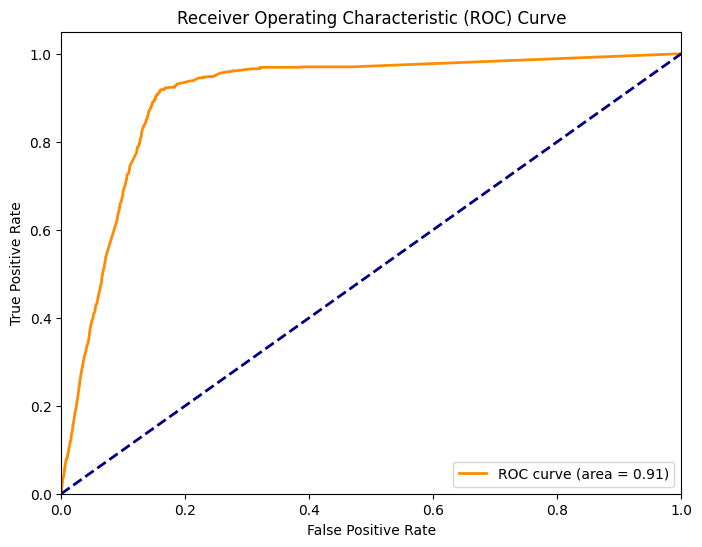

In [ ]:



# Fit the classifier on the training data first
clf.fit(X_train, y_train)

# Then, get the predicted probabilities for the positive class (assumes label 1 is positive)
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:




# Our dataset exhibits a significant class imbalance, where the positive cases (minority class) are vastly underrepresented compared to the negative cases. When training a model on such imbalanced data, the model tends to favor the majority class, resulting in high overall accuracy but very poor performance (low recall and F1-score) for the minority class.
#
# By applying imbalance methods (e.g., oversampling with SMOTE, undersampling, or adjusting class weights), we can rebalance the training data. This helps the model to better learn the decision boundaries for the minority class, improving its ability to correctly predict positive cases.
#
# After rebalancing, the model is retrained to ensure that it is not biased toward the majority class and can generalize better, ultimately leading to a more reliable and effective classifier.

# In[96]:


df.head()


# ####  Oversampling the Dataset to Balance the Target Classes
#
# This process will increase the minority class samples, addressing the imbalance and helping to improve model performance.

# In[97]:


from imblearn.over_sampling import RandomOverSampler

# Separate features and target (assuming 'Result' is the target column)
X = df.drop(columns=['Result'])
y = df['Result']

# Create a RandomOverSampler instance
ros = RandomOverSampler(random_state=42)

# Apply random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled features back to a DataFrame (if not already)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Check the distribution of the target after oversampling
print("Target distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())


# In[98]:


# Ensure X_resampled is a DataFrame (if not already)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Identify categorical columns in the oversampled features (excluding target)
cat_cols = [col for col in X_resampled.columns
            if X_resampled[col].dtype == 'object' or str(X_resampled[col].dtype) == 'category']

# One-hot encode the oversampled feature columns
X_resampled_encoded = pd.get_dummies(X_resampled, columns=cat_cols, drop_first=False).astype(int)

# Display the resulting DataFrame
X_resampled_encoded.head()


# ### Re-Training the models with the oversampled dataset

# In[99]:


# Split the oversampled and one-hot encoded features (X_resampled_encoded) and oversampled target (y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled_encoded, y_resampled, test_size=0.2, random_state=42)


# In[100]:

Target distribution after oversampling:
Result
0    105597
1    105597
Name: count, dtype: int64


In [ ]:



# Define a dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluate each model using 5-fold cross-validation on the training set
print("Cross-validation Accuracy Scores:")
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"{name}: {scores.mean():.3f}")


# In[103]:


Cross-validation Accuracy Scores:
Logistic Regression: 0.887
Decision Tree: 0.901
Random Forest: 0.902
Gradient Boosting: 0.890


In [ ]:


# To view the classification report of each model in order to select the best model

best_accuracy = 0
best_model_name = None
best_model = None

print("\nTest Set Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model = model

print(f"\nBest model based on test set accuracy: {best_model_name} ({best_accuracy:.3f})")


# In[104]:


Test Set Performance:

Logistic Regression - Accuracy: 0.886
              precision    recall  f1-score   support

           0       0.93      0.84      0.88     21007
           1       0.85      0.93      0.89     21232

    accuracy                           0.89     42239
   macro avg       0.89      0.89      0.89     42239
weighted avg       0.89      0.89      0.89     42239


Decision Tree - Accuracy: 0.902
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21007
           1       0.86      0.95      0.91     21232

    accuracy                           0.90     42239
   macro avg       0.91      0.90      0.90     42239
weighted avg       0.91      0.90      0.90     42239


Random Forest - Accuracy: 0.902
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21007
           1       0.87      0.95      0.91     21232

    accuracy                           0.90     42239



Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.9018732798674204

Tuned Model Test Set Performance:
Test Set Accuracy: 0.9018679419493832
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     21007
           1       0.87      0.95      0.91     21232

    accuracy                           0.90     42239
   macro avg       0.91      0.90      0.90     42239
weighted avg       0.91      0.90      0.90     42239



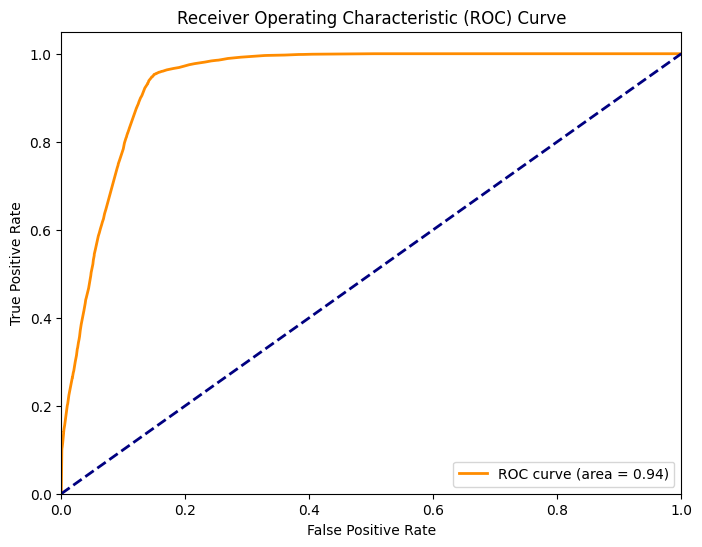

In [ ]:
# Selecting the best model for hyperparameter tuning

from sklearn.model_selection import GridSearchCV

if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "Decision Tree":
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  # 'liblinear' supports l1 penalty
    }
elif best_model_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(estimator=best_model,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nBest hyperparameters:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    # Retrieve the best tuned model
    tuned_model = grid_search.best_estimator_

    # Evaluate the tuned model on the test set
    y_pred_tuned = tuned_model.predict(X_test)
    print("\nTuned Model Test Set Performance:")
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred_tuned))
    print(classification_report(y_test, y_pred_tuned))
else:
    print("No hyperparameter tuning performed because the parameter grid is empty.")


# Before oversampling, overall accuracy was around 96%, but the models performed very poorly on the positive class, recall and F1-score for class 1 were near 0% (for example, Logistic Regression had a recall of 0.01 and an F1-score of 0.03). After oversampling, overall accuracy dropped to about 89–90%, yet the models improved dramatically in detecting positive cases. In particular, the Random Forest model achieved around 90% accuracy with significantly improved recall and F1-scores for the positive class (both around 94–95%), making it the best model for balancing overall performance and positive class detection.

# ### Plotting the ROC Curve for the tuned model

# In[117]:


# Assumes that the positive class is labeled as 1
y_probs = tuned_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# ### Predicting samples of the dataset

# In[113]:

In [ ]:
# Display the resulting DataFrame
X_resampled_encoded.head()


# In[122]:


# Display the resulting DataFrame
y_resampled.head()


# In[115]:


# Taking the first 5 rows of the oversampled and encoded dataset
sample_data = X_resampled_encoded.head(5)

# Use the tuned model to predict on the sample data
sample_predictions = tuned_model.predict(sample_data)


print(sample_predictions)


# In[109]:


# Display the resulting DataFrame
X_resampled_encoded.tail()


# In[123]:


# Display the resulting DataFrame
y_resampled.tail()


# In[111]:


# Taking the last 5 rows of the oversampled and encoded dataset
sample_data = X_resampled_encoded.tail(5)

# Use the tuned model to predict on the sample data
sample_predictions = tuned_model.predict(sample_data)


print(sample_predictions)



[1 0 0 0 0]
[1 1 1 1 1]
